<a href="https://colab.research.google.com/github/rayxtn/amazon_review_classification/blob/main/amazon_review_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import nltk
from nltk import corpus, tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer , PorterStemmer , porter
import re
import sklearn
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from google.colab import drive
drive.mount('/content/drive')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sen_analayzer = SentimentIntensityAnalyzer()

In [5]:
test_text =  "this is a nice !"
sen_analayzer.polarity_scores(test_text)

{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4926}

In [6]:
test_text2 = "this is too bad ! "
sen_analayzer.polarity_scores(test_text2)

{'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.5848}

In [7]:
product = pd.read_csv('/content/drive/MyDrive/csv/Amazon_reviews.csv')
product.head()
product.shape

(568454, 10)

In [8]:
print("Original DataFrame:")
product.head()
product.shape
# cleaning data since there is some errors of missing values and non numerical values in scores

Original DataFrame:


(568454, 10)

In [91]:
# Drop columns with any missing values
df_cleaned = product.dropna(axis=1, how='any')
# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()
# Convert non-numeric values in 'Score' to NaN and then fill missing values with the mean
df_cleaned['Score'] = pd.to_numeric(df_cleaned['Score'], errors='coerce')  # Convert to numeric, invalid parsing becomes NaN
df_cleaned['Score'] = df_cleaned['Score'].fillna(df_cleaned['Score'].mean())  # Fill NaN values with the mean
print("\nDataFrame after cleaning (removed columns with missing data):")
df_cleaned.head()
df_cleaned.shape


DataFrame after cleaning (removed columns with missing data):


(568454, 8)

In [92]:
# due to this anything less than 3 would be a negative review , just for testing and comparing
df_cleaned['Score'].value_counts().to_frame().T

Score,5,4,1,3,2
count,363122,80655,52268,42640,29769


In [93]:
#applying the nltk sentiment analsis to the first review test
sen_analayzer.polarity_scores(df_cleaned.loc[0]['Text'])

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

Result compoud seems > than 0 it means positive
going to check the score and compare :

In [94]:
print(df_cleaned.loc[0]['Score'])

5


Result of score included says 5 means it is correct

In [95]:
df_cleaned.isnull().sum().to_frame().T

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text
0,0,0,0,0,0,0,0,0


In [96]:
df_cleaned['scores_analysis'] = df_cleaned['Score'][:3000].apply(lambda x: 'positive' if x > 2 else 'negative')
df_cleaned.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,scores_analysis
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,I have bought several of the Vitality canned d...,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Product arrived labeled as Jumbo Salted Peanut...,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,This is a confection that has been around a fe...,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,If you are looking for the secret ingredient i...,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy at a great price. There was a wid...,positive


In [97]:
df_cleaned.shape

(568454, 9)

# **Creating a new variable in the data frame to check the text analysis and the results**

In [102]:
df_cleaned['mysentiment_scores'] = df_cleaned['Text'][:3000].apply(lambda x: sen_analayzer.polarity_scores(x))
df_cleaned.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,scores_analysis,mysentiment_scores,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,I have bought several of the Vitality canned d...,positive,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...",0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Product arrived labeled as Jumbo Salted Peanut...,negative,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,This is a confection that has been around a fe...,positive,"{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'co...",0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,If you are looking for the secret ingredient i...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy at a great price. There was a wid...,positive,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp...",0.9468


In [99]:
len(df_cleaned['mysentiment_scores'])

568454

In [103]:
df_cleaned['compound'] = df_cleaned['mysentiment_scores'][:3000].apply(lambda x: x['compound'])
df_cleaned.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,scores_analysis,mysentiment_scores,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,I have bought several of the Vitality canned d...,positive,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...",0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Product arrived labeled as Jumbo Salted Peanut...,negative,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,This is a confection that has been around a fe...,positive,"{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'co...",0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,If you are looking for the secret ingredient i...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy at a great price. There was a wid...,positive,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp...",0.9468


In [108]:
df_cleaned['compound_score'] = df_cleaned['compound'][:3000].apply(lambda x: 'positive' if x > 0 else 'negative')
df_cleaned.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,scores_analysis,mysentiment_scores,compound,compound_score,sentiment_code
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,I have bought several of the Vitality canned d...,positive,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...",0.9441,positive,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Product arrived labeled as Jumbo Salted Peanut...,negative,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",-0.5664,negative,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,This is a confection that has been around a fe...,positive,"{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'co...",0.8265,positive,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,If you are looking for the secret ingredient i...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy at a great price. There was a wid...,positive,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp...",0.9468,positive,1.0


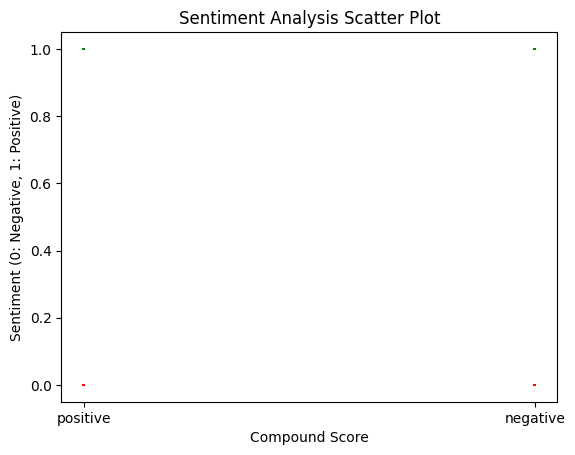

# **Evaluation or confusion Matrix**

In [110]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(df_cleaned['scores_analysis'][:3000],df_cleaned['compound_score'][:3000]))
print(classification_report(df_cleaned['scores_analysis'][:3000],df_cleaned['compound_score'][:3000]))
print(accuracy_score(df_cleaned['scores_analysis'][:3000],df_cleaned['compound_score'][:3000]))

[[ 210  251]
 [ 169 2370]]
              precision    recall  f1-score   support

    negative       0.55      0.46      0.50       461
    positive       0.90      0.93      0.92      2539

    accuracy                           0.86      3000
   macro avg       0.73      0.69      0.71      3000
weighted avg       0.85      0.86      0.85      3000

0.86


# Building a machine learning approche

# **Preprocessing **

In [111]:
from tqdm import tqdm

preprocessed_reviews = []
for review in tqdm(df_cleaned['Text'][:3000]):
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    preprocessed_reviews.append(review)
#


100%|██████████| 3000/3000 [00:34<00:00, 85.85it/s]


# Testing the difference after processing the **column**

In [112]:
print(df_cleaned['Text'][0])

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


In [113]:
print(preprocessed_reviews[0])

bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better


# ***Feature Extraction***

*Using TF-IDF*

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_reviews).toarray()
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [115]:
df_cleaned['scores_analysis'] = df_cleaned['scores_analysis'][:3000].map({'positive':1,'negative':0})
df_cleaned.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,scores_analysis,mysentiment_scores,compound,compound_score,sentiment_code
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,I have bought several of the Vitality canned d...,1.0,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...",0.9441,positive,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Product arrived labeled as Jumbo Salted Peanut...,0.0,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",-0.5664,negative,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,This is a confection that has been around a fe...,1.0,"{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'co...",0.8265,positive,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,If you are looking for the secret ingredient i...,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy at a great price. There was a wid...,1.0,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp...",0.9468,positive,1.0


In [116]:
df_cleaned['scores_analysis'].value_counts()

,count
scores_analysis,
1.0,2539
0.0,461


# **Split the data into train and test now**

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_cleaned['scores_analysis'][:3000], test_size=0.2, random_state=1)


random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

In [ ]:
y_pred_train = rf.predict(X_train)
y_test = rf.predict(X_test)

In [120]:
print(accuracy_score(y_train, y_pred_train))
print('****************************************')
print(accuracy_score(y_test, y_test))

1.0
****************************************
1.0
